1. На основе датасета titanic обучить дерево решений
2. Подобрать оптимальную глубину дерева так же, как мы делали на занятии
3. Определить самые важные фичи
4. Визуализировать полученное дерево

In [1]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO
import matplotlib.pyplot as plt
from functools import reduce
import pandas as pd
import numpy as np
import re
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [2]:
data = pd.read_csv("train.csv")
drop_list = ['Name', 'Ticket', 'Cabin','PassengerId']
data.shape

(891, 12)

In [3]:
# берем первую букву каюты или ставим 'N'
data['n_cabin'] = data[data.Cabin.notnull()].Cabin.str[0]
data['n_cabin'][data['n_cabin'].isnull()] = 'N'

C:\Users\alexe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
# От имени оставляем титулы, встречающееся более чем в 0.5% записей
data['n_name'] = data.Name.apply(lambda x: (re.findall(', (\w+)',x)[0]))
data['title'] =  data.n_name.apply(lambda x :x if data[data.n_name == x].shape[0] > data.shape[0]*0.005 else 'NA')
drop_list.append('n_name')
data.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'NA', 'Rev', 'Dr'], dtype=object)

In [5]:
# пропуски
data.Embarked[data.Embarked.isnull()]  = 'NA'
data.Age[data.Age.isnull()] = data.Age.mean()


C:\Users\alexe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\alexe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# LE
le = LabelEncoder()
columns_list = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'n_cabin', 'title' ]
for i in columns_list:
    print(i, data[i].unique())
    data['n_' + i] = le.fit_transform(data[i])
    drop_list.append(i)   

Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q' 'NA']
n_cabin ['N' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
title ['Mr' 'Mrs' 'Miss' 'Master' 'NA' 'Rev' 'Dr']


In [7]:
# убираем лишние столбцы
n_data = data.drop(drop_list, axis=1)

In [22]:
# обучаем модель на разных значениях максимальной глубины дерева
x = n_data.drop('Survived', axis = 1)
y = n_data.Survived
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.3)

result_dtree = reduce(lambda r, i: r.append({'depth':i,'score':DecisionTreeClassifier(max_depth=i).fit(x_train, y_train).score(x_test, y_test)}, ignore_index=True), range(1,100), pd.DataFrame())
result_rtree = reduce(lambda r, i: r.append({'depth':i,'score':RandomForestClassifier(max_depth=i).fit(x_train, y_train).score(x_test, y_test)}, ignore_index=True), range(1,100), pd.DataFrame())

result_dtree_max = result_dtree[result_dtree.score == result_dtree.score.max()]
result_rtree_max = result_rtree[result_rtree.score == result_rtree.score.max()]


C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Для DecisionTreeClassifier наилучший результат 0.8134 достигается при максимальной глубине 6
Для RandomForestClassifier наилучший результат 0.8284 достигается при максимальной глубине 41


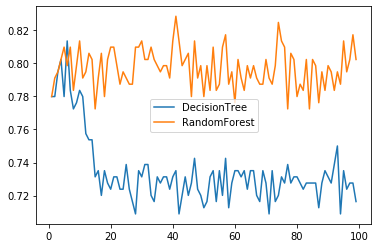

In [23]:

plt.plot(result_dtree.depth, result_dtree.score, label = 'DecisionTree')
plt.plot(result_rtree.depth, result_rtree.score, label = 'RandomForest')
plt.legend()

print(f'Для DecisionTreeClassifier наилучший результат {round(result_dtree_max.score.iloc[0],4)} достигается при максимальной глубине {int(result_dtree_max.depth.iloc[0])}')
print(f'Для RandomForestClassifier наилучший результат {round(result_rtree_max.score.iloc[0],4)} достигается при максимальной глубине {int(result_rtree_max.depth.iloc[0])}')

Text(0.5, 1.0, 'Важность признаков в DecisionTreeClassifier')

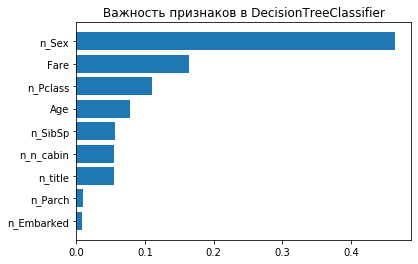

In [24]:
# Важность признаков DecisionTreeClassifier при наилучшем результате
dtree = DecisionTreeClassifier(max_depth=int(result_dtree_max.depth.iloc[0]))
dtree.fit(x_train, y_train)
dtree_feat = pd.DataFrame({'feat_name':x.columns, 'feat_importance':dtree.tree_.compute_feature_importances(normalize=True)}).sort_values(by = 'feat_importance', ascending=True)
plt.barh(dtree_feat.feat_name, dtree_feat.feat_importance)
plt.title('Важность признаков в DecisionTreeClassifier')

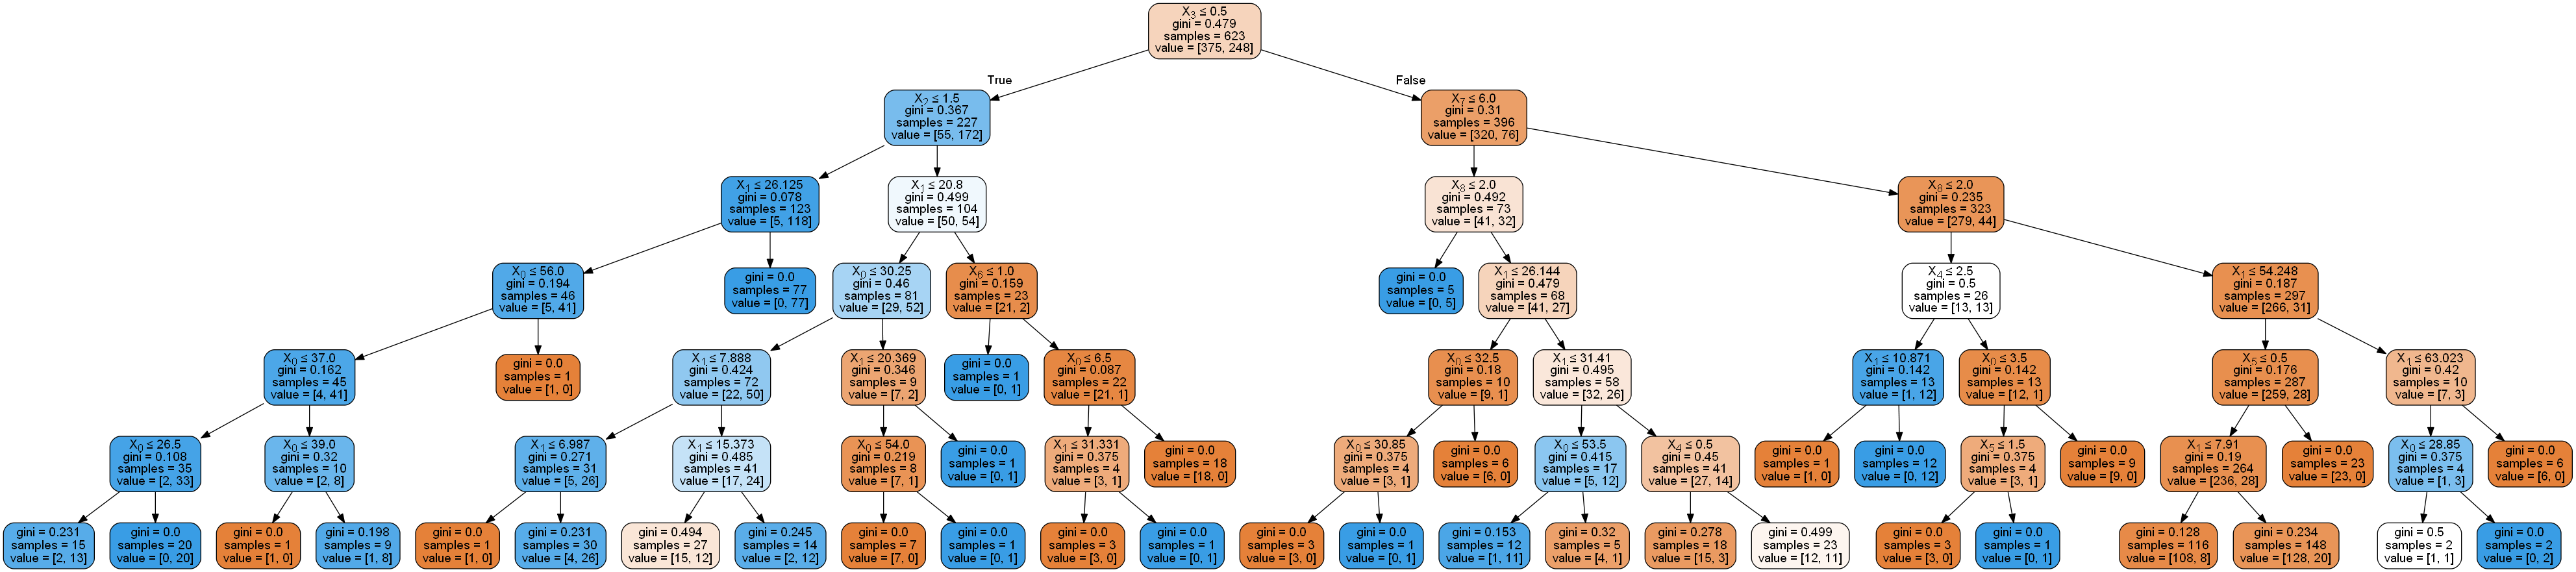

In [25]:
def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
export_graphviz(dtree, filled=False, rounded=True, special_characters=True)
Image(graph.create_png())